# Density of entries distributed by their average scores
Represented as 1D scatter plots

## Configuration

In [67]:
DB_PATH = "Path/to/db" # FIXME: Supply path to db file
PLOT_FIGURE_SIZE = (16, 4)
PLOT_LINE_WIDTH = 1.5
PLOT_LINE_GRADIENT = ("red_green_gradient", ["red", "green"])

### Settings from DB

In [68]:
import pandas as pd
from sqlalchemy import create_engine

db_engine = create_engine(f"sqlite+pysqlite:///{DB_PATH}")

In [69]:
settings_df = pd.read_sql_table("settings", con=db_engine)
MIN_SCORE = float(settings_df.loc[
    (settings_df["group_key"] == "validation") & (settings_df["setting"] == "score_min_value"), "value"].iloc[0])
MAX_SCORE = float(settings_df.loc[
    (settings_df["group_key"] == "validation") & (settings_df["setting"] == "score_max_value"), "value"].iloc[0])

## Entries average scores

In [70]:
entries_stats_df = pd.read_sql_table("stats_entries", con=db_engine)
entries_avg_scores = entries_stats_df["avg_score"]

## Plots generation

### Density 1D Scatter plot ([```MIN_SCORE```, ```MAX_SCORE```])

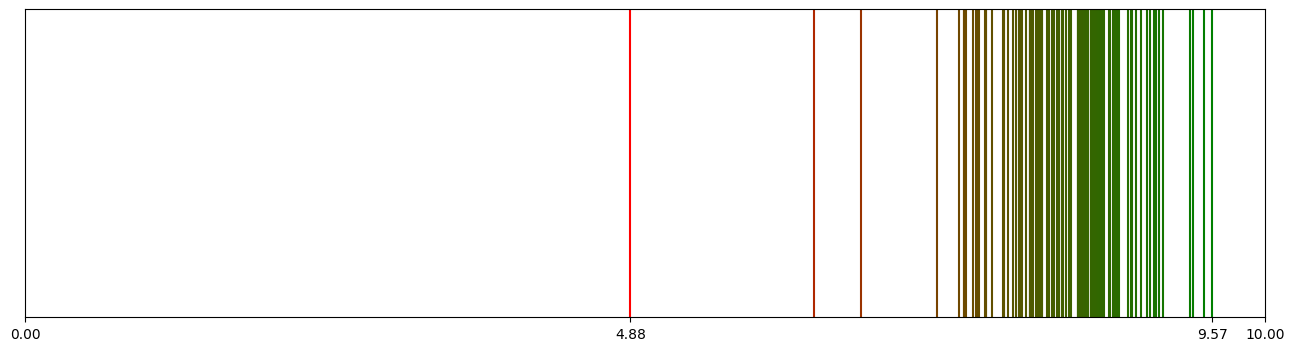

In [71]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap

# Create a custom colormap
custom_cmap = LinearSegmentedColormap.from_list(*PLOT_LINE_GRADIENT)
normalized = Normalize(vmin=min(entries_avg_scores), vmax=max(entries_avg_scores))
mapped_colors = custom_cmap(normalized(entries_avg_scores))

# Create plot
plt.figure(figsize=PLOT_FIGURE_SIZE)
for x, color in zip(entries_avg_scores, mapped_colors):
    plt.vlines(x, ymin=0, ymax=1, colors=color, linewidth=PLOT_LINE_WIDTH)
plt.ylim(0, 1)

plt.xticks([MIN_SCORE, min(entries_avg_scores), max(entries_avg_scores), MAX_SCORE])
plt.yticks([])

plt.show()

### Density 1D Scatter plot ([```min(entries_avg_score)```, ```max(entries_avg_score)```])

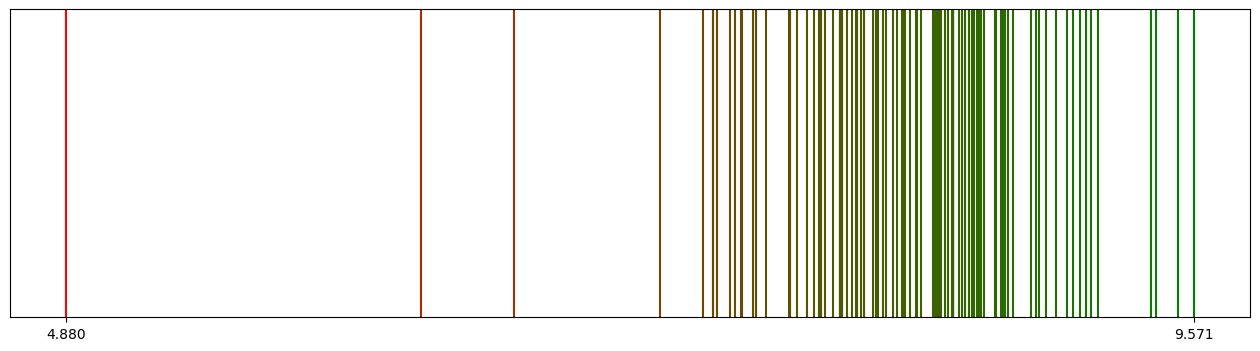

In [72]:
plt.figure(figsize=PLOT_FIGURE_SIZE)
for x, color in zip(entries_avg_scores, mapped_colors):
    plt.vlines(x, ymin=0, ymax=1, colors=color, linewidth=PLOT_LINE_WIDTH)
plt.ylim(0, 1)

plt.xticks([min(entries_avg_scores), max(entries_avg_scores)])
plt.yticks([])

plt.show()